In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
titanic=sns.load_dataset("titanic")

In [3]:
features =["pclass","sex","fare","embarked","age"]
target=["survived"]

In [4]:
#handling the missing values
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(strategy ="median")
titanic[["age"]] = imp_median.fit_transform(titanic[["age"]])

imp_freq=SimpleImputer(strategy ="most_frequent")
titanic[["embarked"]] = imp_freq.fit_transform(titanic[["embarked"]])

titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
from sklearn.preprocessing import LabelEncoder

# trasnform the inout to numbers
le=LabelEncoder()

titanic["sex"]=le.fit_transform(titanic["sex"])
titanic["embarked"]=le.fit_transform(titanic["embarked"])

titanic.head()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True


In [6]:
X=titanic[features]
y=titanic[target]

X_train,X_test,y_train,y_test= train_test_split(
    X,y,test_size = 0.2 , stratify=y
)


# PREPUNING

for depth 2 ,accuracy=0.8044692737430168
for depth 3 ,accuracy=0.8324022346368715
for depth 4 ,accuracy=0.8156424581005587
for depth 5 ,accuracy=0.7932960893854749
for depth 6 ,accuracy=0.8324022346368715
for depth 7 ,accuracy=0.8379888268156425


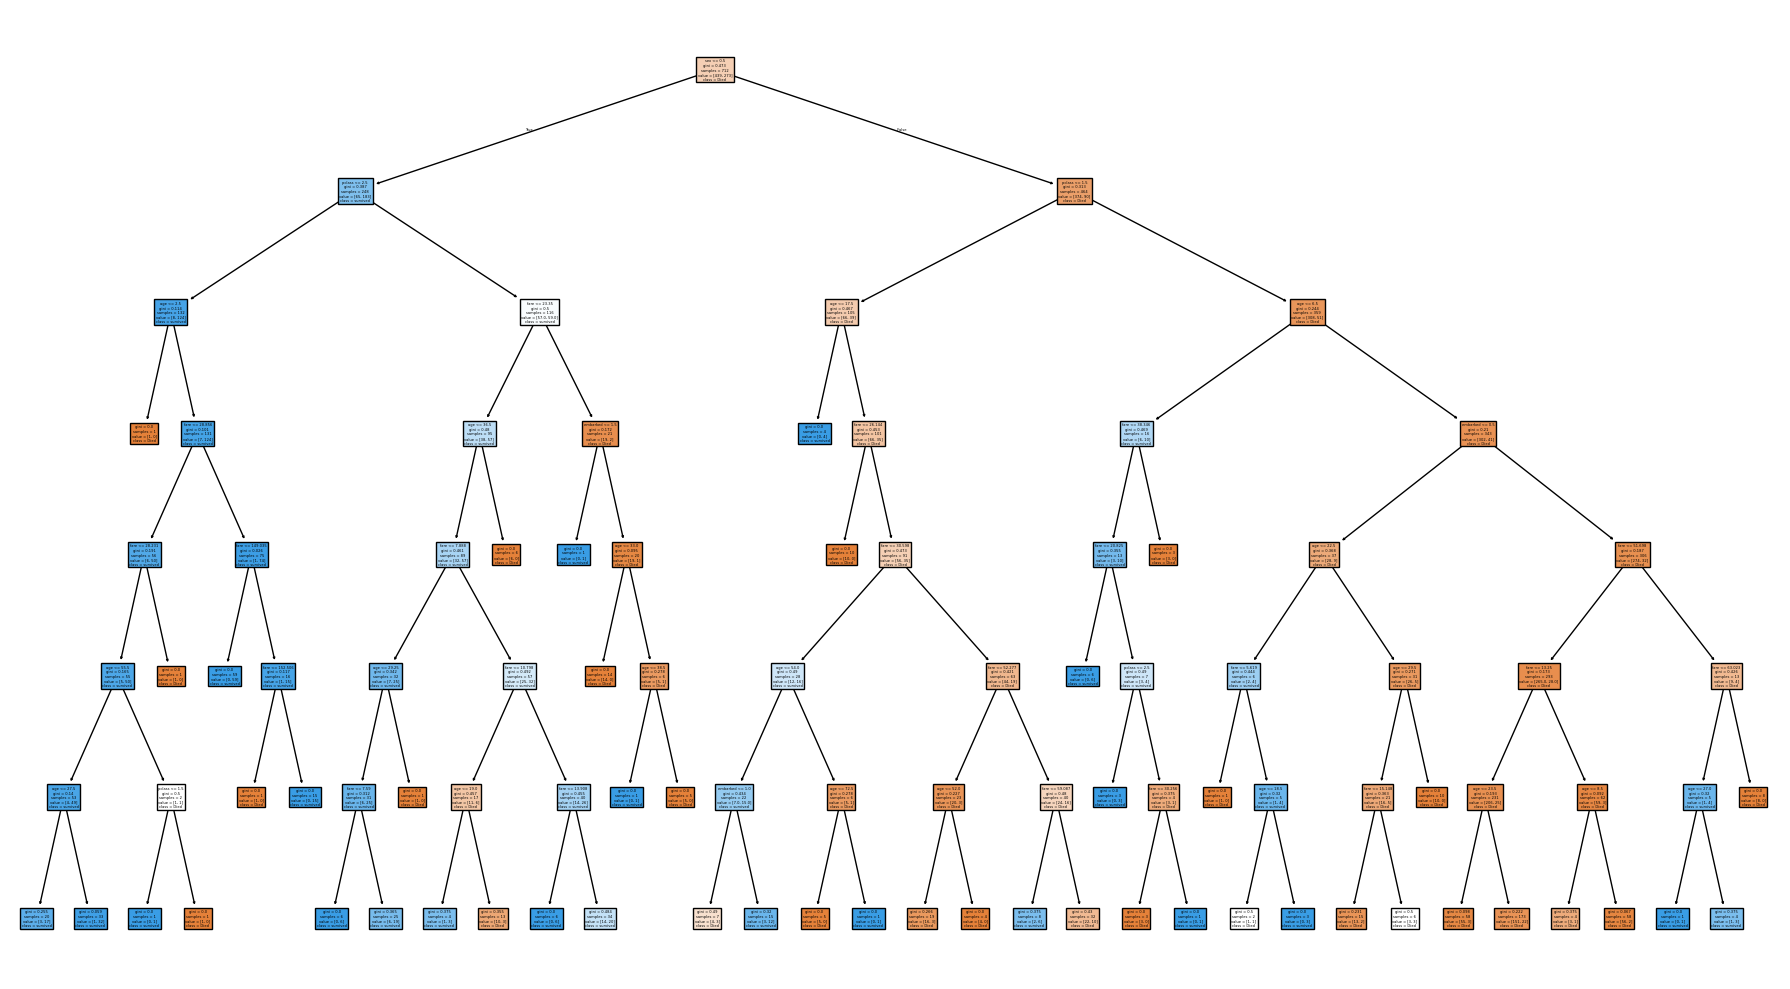

for depth 8 ,accuracy=0.8324022346368715


In [7]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import  accuracy_score

max_depth=[2,3,4,5,6,7,8]

for depth in max_depth:
    model=DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train,y_train)

    acc=model.score(X_test,y_test)
    print(f"for depth {depth} ,accuracy={acc}")    

    if depth==7:
        plt.figure(figsize=(18,10))  
        plot_tree(
            model,
            feature_names=X.columns,
            class_names=["Died","survived"],
            filled=True,
        )

        plt.tight_layout()
        plt.show()


for min_samples5,accuracy=0.8212290502793296
for min_samples10,accuracy=0.7988826815642458


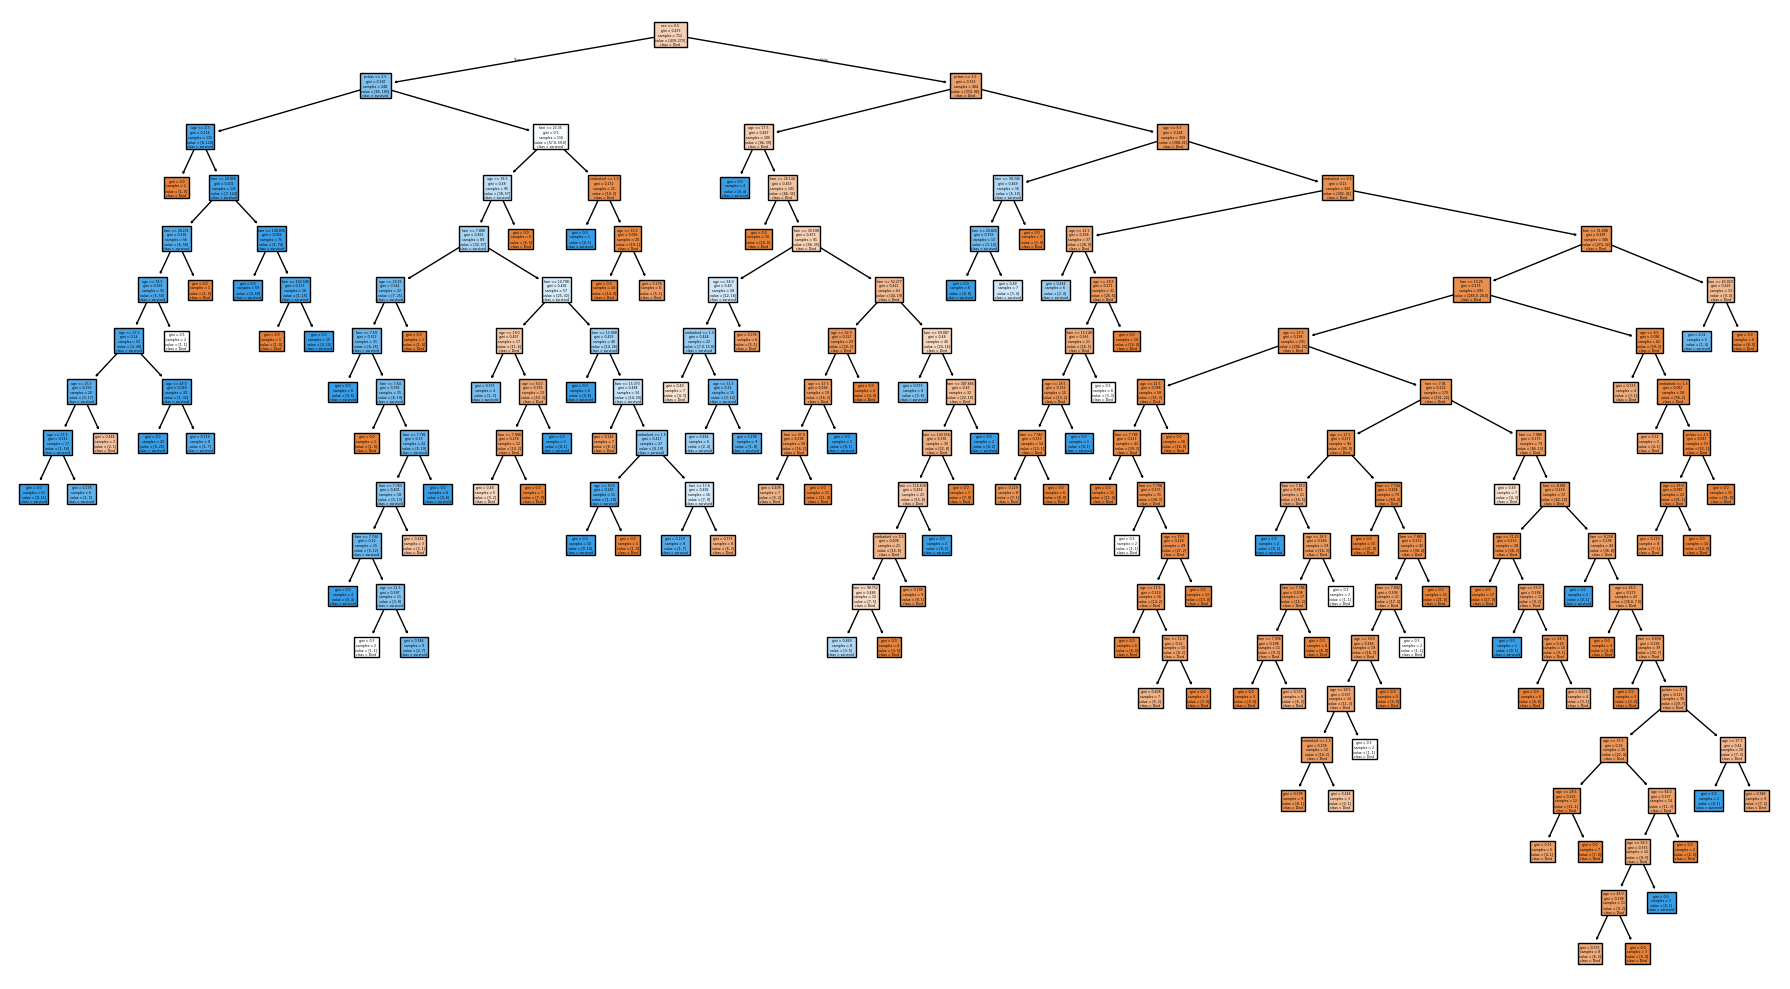

for min_samples15,accuracy=0.8100558659217877
for min_samples20,accuracy=0.8212290502793296
for min_samples25,accuracy=0.8379888268156425
for min_samples30,accuracy=0.8268156424581006


In [8]:
min_samples=[5,10,15,20,25,30]

for sample in min_samples:
    model=DecisionTreeClassifier(min_samples_split=sample)
    model.fit(X_train,y_train)

    acc=model.score(X_test,y_test)
    print(f"for min_samples{sample},accuracy={acc}")  
    
    if sample==10:
        plt.figure(figsize=(18,10))
        plot_tree(
            model,
            feature_names=X.columns,
            class_names=["Died","survived"],
            filled=True,
        )

        plt.tight_layout()
        plt.show()


# POST PRUNING

In [9]:
full_tree=DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=30)

In [10]:
path=full_tree.cost_complexity_pruning_path(X_train,y_train)
ccp_alpha=path.ccp_alphas
# print(ccp_alpha)

#train model for all alphas
tree=[]

for alpha in ccp_alpha:
    full_tree=DecisionTreeClassifier(random_state=42,ccp_alpha=alpha)
    model.fit(X_train,y_train)
    acc=model.score(X_test,y_test)

    tree.append((model,alpha))

# print("the best alpha value is: " ,best_alpha)

In [11]:
best_acc=0
best_alpha=0

for model,alpha in tree:
    curr_acc=model.score(X_test,y_test)
    
    if curr_acc> best_acc:
        best_acc=curr_acc
        best_alpha=alpha
        
print(" the best_acc value is: ", best_acc)
print(" the best_alpha value is: ", best_alpha)



 the best_acc value is:  0.8268156424581006
 the best_alpha value is:  0.0


In [12]:
best_acc
best_alpha

np.float64(0.0)